<a href="https://colab.research.google.com/github/Cherberushka/BOT_YT/blob/master/HW_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [ ]:
!pip install grequests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 7.6 MB/s 
     |████████████████████████████████| 261 kB 33.7 MB/s 


In [ ]:
import grequests
import sys
del sys.modules["grequests"] 
del grequests
del sys.modules["gevent.monkey"] 
import grequests
import requests
from IPython.display import clear_output
import pandas as pd

# Задание 1
## Парсинг сайта.

## Сбор ID всех объектов

In [ ]:
offset_ = 1
limit_ = 1000
objids = []
flag = True
while flag:
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    try:
        res = requests.get(url)
        obj_data = res.json()
        objects_list = obj_data.get('data').get('list')

        # Условие выхода, иначе бесконечный парсинг - рекорд 31001  ;)
        if not objects_list:
            flag = False
            break
        
        objids.extend([x.get('objId') for x in objects_list])
        offset_ += limit_
        print(offset_)
    except:
        flag = False
print('Парсинг окончен {}'.format(len(objids)))


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.8/dist-packages/gevent/threadpool.py", line 163, in _before_run_task
    _sys.settrace(_get_thread_trace())


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.8/dist-packages/gevent/threadpool.py", line 168, in _after_run_task
    _sys.settrace(None)



1001
2001
3001
4001
5001
6001
7001
8001
9001
10001
11001
Парсинг окончен 10752


## Сбор объектов по ID

In [ ]:
f_obj = []
fullObj_urls = []

for objID in objids:
    fullObj_urls.append(
        f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objID}')

rs_f_obj = [grequests.get(u) for u in fullObj_urls]

for res in grequests.imap(rs_f_obj, size=16):
    if not res.ok:
        continue

    obj_data = res.json()
    full_list = obj_data.get('data')

    if not full_list:
        continue

    clear_output()
    f_obj.append(full_list)
    print('\n', len(f_obj))
    print(f'{len(f_obj)}/{len(objids)}')

print(len(f_obj))


 10752
10752/10752
10752


In [ ]:
df = pd.json_normalize(f_obj)
print(df.head())

      id  hobjId    pdId  region  \
0  13398   37165   28141      72   
1  13397   37201   28141      72   
2  36912  117248  337586      26   
3  39176  119604  435352      23   
4  39175  119603  435351      23   

                                             address  floorMin  floorMax  \
0                    г Тюмень, ул Профсоюзная, д. 56         7        10   
1                    г Тюмень, ул Профсоюзная, д. 56         6        12   
2  г Ставрополь, ул Шпаковская, Доваторцев, д. 10...         2        10   
3  г Краснодар, улица Валерия Гассия, д. 4/7, лит...        25        25   
4  г Краснодар, улица Валерия Гассия, д. 4/7, лит...        25        25   

   objElemLivingCnt objReady100PercDt wallMaterialShortDesc  ... metro.time  \
0                43        2024-12-31                Другое  ...        NaN   
1                65        2024-12-31                Другое  ...        NaN   
2               104        2022-12-31        Монолит-кирпич  ...        NaN   
3         

In [ ]:
df.to_csv("output.csv")

# Задание 2
## Создание таблиц показателей по регионам для анализа даных.

In [ ]:
import numpy as np
import pandas as pd

## Задача 1
### Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:

In [ ]:
f = pd.read_csv('output.csv', index_col=0)

print('Датафрейм: \n', df.head())
print('Список атрибутов \n', df.columns.tolist(), end=2 * '\n')

# Для расчётов нужны лишь некоторые атрибуты датафрейма:
# id, region, objPriceAvg, objSquareLiving, objReady100PercDt
# floorMax,objFlatCnt, objElemParkingCnt

df_count = df[['id', 'region', 'objPriceAvg', 'objSquareLiving', 'objReady100PercDt', 'floorMax', 'objFlatCnt',
               'objElemParkingCnt']]
print('Для расчётов нужны лишь некоторые атрибуты датафрейма: \n', df_count.head(), end=2 * '\n')
print('Информация по датафрейму: ')
df_count.info()
print('\n')

Датафрейм: 
       id  hobjId    pdId  region  \
0  13398   37165   28141      72   
1  13397   37201   28141      72   
2  36912  117248  337586      26   
3  39176  119604  435352      23   
4  39175  119603  435351      23   

                                             address  floorMin  floorMax  \
0                    г Тюмень, ул Профсоюзная, д. 56         7        10   
1                    г Тюмень, ул Профсоюзная, д. 56         6        12   
2  г Ставрополь, ул Шпаковская, Доваторцев, д. 10...         2        10   
3  г Краснодар, улица Валерия Гассия, д. 4/7, лит...        25        25   
4  г Краснодар, улица Валерия Гассия, д. 4/7, лит...        25        25   

   objElemLivingCnt objReady100PercDt wallMaterialShortDesc  ... metro.time  \
0                43        2024-12-31                Другое  ...        NaN   
1                65        2024-12-31                Другое  ...        NaN   
2               104        2022-12-31        Монолит-кирпич  ...        NaN 

In [ ]:
# Создадим копию датафреймап, где удалим пропущеные значения
df_copy = df_count.copy()
df_copy = df_copy.dropna().reset_index(drop=True)
df_copy = df_copy.dropna(axis=0).reset_index(drop=True)
print('Копия датафрейма, с удаленными NaN значениями: \n', df_copy.head(10), end=2 * '\n')

Копия датафрейма, с удаленными NaN значениями: 
       id  region  objPriceAvg  objSquareLiving objReady100PercDt  floorMax  \
0  13398      72      47886.0          4812.98        2024-12-31        10   
1  13397      72      45523.0          6248.51        2024-12-31        12   
2  36912      26      62703.0          8295.20        2022-12-31        10   
3  39176      23     103497.0         11535.60        2024-09-30        25   
4  39175      23     102945.0         21932.80        2023-06-30        25   
5  10891      35      44503.0         12847.23        2023-03-31        16   
6  30292      16     108093.0         29877.90        2023-03-31        26   
7  44076      52     117136.0             0.00        2022-09-30         6   
8  41421      54      75817.0           528.10        2023-03-31         4   
9  41420      54      81058.0           528.10        2023-06-30         4   

   objFlatCnt  objElemParkingCnt  
0          43                  0  
1          65         

## Задача 2
### Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

In [ ]:
# Добавим колонку "вес" для взвешенного среднего
df_copy['Price*Square'] = df_copy['objPriceAvg'] * df_copy['objSquareLiving']

In [ ]:
# Сводная таблица по регионам ("вес" к площади)
sum_table_wt = pd.pivot_table(df_copy,
                              index=["region"],
                              values=["objSquareLiving", "objPriceAvg", "Price*Square"],
                              aggfunc=[np.sum])
print('Сводная таблица по регионам ("вес" к площади): \n',
      sum_table_wt.to_string())  # sum_table_wt.head(), sum_table_wt.tail())

Сводная таблица по регионам ("вес" к площади): 
                  sum                             
        Price*Square  objPriceAvg objSquareLiving
region                                           
1       1.716851e+10    2994539.0       226875.44
2       1.872145e+11   15091501.0      2172147.92
3       1.907571e+10    2707149.0       285059.46
4       1.697181e+09     414352.0        20026.69
5       6.491208e+09     379224.0       182979.99
7       5.873592e+09     432125.0       103195.60
8       1.663651e+09     463134.0        32149.78
10      1.257899e+10    1903484.0       127479.91
11      3.869742e+09     495971.0        47476.89
12      1.216284e+10    2173336.0       205546.63
13      7.139943e+09     936119.0       109641.16
14      3.063632e+10    3927428.0       265507.00
15      9.443767e+09    1487027.0       192789.22
16      2.391687e+11   22506407.0      1830316.62
17      2.711445e+09    1223831.0        21846.42
18      9.156048e+10    9080193.0      1164330.48
1

In [ ]:
# Сводная таблица для ср. знач. по регионам
sum_table_wt = sum_table_wt.droplevel(0, axis=1)  # сбросим id
sum_table_wt['avg_region'] = sum_table_wt['Price*Square'] / sum_table_wt[
    'objSquareLiving']  # добавим атрибут для ср. знач. по региону
sum_table_wt = sum_table_wt.sort_values(
    'avg_region').reset_index()  # отсортируем ср. знач. по региону и добавим новые индексы

print(sum_table_wt.info())
print('Сводная таблица для ср. знач. цены за кв.м по регионам: \n', sum_table_wt.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           79 non-null     int64  
 1   Price*Square     79 non-null     float64
 2   objPriceAvg      79 non-null     float64
 3   objSquareLiving  79 non-null     float64
 4   avg_region       79 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 3.2 KB
None
Сводная таблица для ср. знач. цены за кв.м по регионам: 
    region  Price*Square  objPriceAvg  objSquareLiving    avg_region
0      51  1.768437e+07      20442.0           865.10  20442.000000
1      20  2.231747e+09     100773.0         70559.48  31629.305591
2       5  6.491208e+09     379224.0        182979.99  35474.958364
3      15  9.443767e+09    1487027.0        192789.22  48984.931807
4       8  1.663651e+09     463134.0         32149.78  51746.888221


In [ ]:
print(sum_table_wt.to_string())

    region  Price*Square  objPriceAvg  objSquareLiving     avg_region
0       51  1.768437e+07      20442.0           865.10   20442.000000
1       20  2.231747e+09     100773.0         70559.48   31629.305591
2        5  6.491208e+09     379224.0        182979.99   35474.958364
3       15  9.443767e+09    1487027.0        192789.22   48984.931807
4        8  1.663651e+09     463134.0         32149.78   51746.888221
5       60  9.017893e+09    1332040.0        167440.69   53857.235065
6       33  3.732605e+10    4844461.0        685477.58   54452.624467
7       35  2.778675e+10    4763831.0        502274.02   55321.886955
8       67  1.431777e+10    2574437.0        254440.39   56271.606291
9        7  5.873592e+09     432125.0        103195.60   56917.080908
10      68  1.129369e+10    1714012.0        197179.89   57276.051222
11      64  2.710283e+10    2491765.0        462421.79   58610.627256
12      12  1.216284e+10    2173336.0        205546.63   59173.138474
13      37  1.440290

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Задача 3
### Рассчитать объемы вводимого жилья по регионам и по годам.

In [ ]:
# Сводная таблица для объема вводимого жилья по годам и регионам
table_vh = df[['region', 'objSquareLiving', 'objReady100PercDt']].copy()
table_vh['year'] = pd.DatetimeIndex(df['objReady100PercDt']).year
# Удаление NaN
table_vh['objSquareLiving'] = df['objSquareLiving'].replace(0, np.nan)
table_vh = table_vh.dropna(axis=0).reset_index(drop=True)

In [ ]:
print(table_vh.info())
print('Сводная таблица для объема вводимого жилья по годам и регионам: \n', table_vh.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9588 entries, 0 to 9587
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             9588 non-null   int64  
 1   objSquareLiving    9588 non-null   float64
 2   objReady100PercDt  9588 non-null   object 
 3   year               9588 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 299.8+ KB
None
Сводная таблица для объема вводимого жилья по годам и регионам: 
    region  objSquareLiving objReady100PercDt    year
0      72          4812.98        2024-12-31  2024.0
1      72          6248.51        2024-12-31  2024.0
2      26          8295.20        2022-12-31  2022.0
3      23         11535.60        2024-09-30  2024.0
4      23         21932.80        2023-06-30  2023.0


In [ ]:
pivot_table_vh = table_vh.pivot_table(index=["region"],
                                      columns=["year"],
                                      values="objSquareLiving",
                                      aggfunc=np.sum)

In [ ]:
print(pivot_table_vh.info())
print('Таблица для объема вводимого жилья по годам и регионам: \n', table_vh.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 1 to 92
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2017.0  2 non-null      float64
 1   2018.0  1 non-null      float64
 2   2019.0  1 non-null      float64
 3   2020.0  7 non-null      float64
 4   2021.0  7 non-null      float64
 5   2022.0  73 non-null     float64
 6   2023.0  78 non-null     float64
 7   2024.0  77 non-null     float64
 8   2025.0  69 non-null     float64
 9   2026.0  45 non-null     float64
 10  2027.0  28 non-null     float64
 11  2028.0  17 non-null     float64
 12  2029.0  8 non-null      float64
 13  2030.0  6 non-null      float64
 14  2031.0  6 non-null      float64
 15  2032.0  3 non-null      float64
 16  2033.0  2 non-null      float64
 17  2034.0  1 non-null      float64
 18  2036.0  3 non-null      float64
 19  2038.0  1 non-null      float64
dtypes: float64(20)
memory usage: 13.3 KB
None
Таблица для объема вводимого жилья п

In [ ]:
#  Объем вводимого жилья по годам
value_year = table_vh.groupby(['year']).agg({'objSquareLiving': 'sum'}).reset_index()
print(value_year.info(), '\n')
print('Таблица для объема вводимого жилья по годам: \n', value_year)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             20 non-null     float64
 1   objSquareLiving  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes
None 

Таблица для объема вводимого жилья по годам: 
       year  objSquareLiving
0   2017.0         30504.00
1   2018.0         11648.00
2   2019.0          9693.58
3   2020.0        134258.71
4   2021.0         93954.23
5   2022.0      12058802.24
6   2023.0      36462915.89
7   2024.0      30046093.90
8   2025.0      15409652.80
9   2026.0       4085239.53
10  2027.0       1146259.49
11  2028.0        355905.09
12  2029.0        212619.81
13  2030.0        189586.13
14  2031.0        190594.41
15  2032.0         28128.97
16  2033.0         24798.43
17  2034.0          5843.92
18  2036.0         59206.71
19  2038.0          8765.88


In [ ]:
#  Объем вводимого жилья по регионам по площади
value_square = table_vh.groupby(['region']).agg({'objSquareLiving': 'sum'}).reset_index().sort_values('objSquareLiving')
print(value_square.info(), '\n')
print('Таблица для объема вводимого жилья по площади: \n', value_square)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 48 to 74
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           81 non-null     int64  
 1   objSquareLiving  81 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB
None 

Таблица для объема вводимого жилья по площади: 
     region  objSquareLiving
48      51           865.10
76      79          2145.95
46      49          3171.20
15      17         21846.42
3        4         24329.92
..     ...              ...
63      66       3766839.14
75      78       8297873.05
21      23       8480868.49
47      50       8727896.77
74      77      16464372.14

[81 rows x 2 columns]


## Задача 4
### Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах

In [ ]:
#  Сравнение этажности домов в разных регионах
floor_region = df_copy.groupby(['region']).agg({'floorMax': 'mean'}).reset_index().sort_values('floorMax')
print(floor_region.info(), '\n')
print('Этажность домов (ср.) в разных регионах: \n', floor_region)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 47 to 73
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    79 non-null     int64  
 1   floorMax  79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB
None 

Этажность домов (ср.) в разных регионах: 
     region   floorMax
47      51   3.000000
40      44   4.574468
76      89   6.000000
14      17   6.090909
6        8   6.444444
..     ...        ...
1        2  16.951087
58      62  18.137931
17      20  19.000000
62      66  19.930894
73      77  22.572965

[79 rows x 2 columns]


In [ ]:
#  Сравнение количества квартир в разных регионах
amount_apart = df_copy.groupby(['region']).agg({'objFlatCnt': 'sum'}).reset_index().sort_values('objFlatCnt')
print(amount_apart.info(), '\n')
print('Количество квартир в разных регионах: \n', amount_apart)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 47 to 73
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   region      79 non-null     int64
 1   objFlatCnt  79 non-null     int64
dtypes: int64(2)
memory usage: 1.9 KB
None 

Количество квартир в разных регионах: 
     region  objFlatCnt
47      51          15
45      49          61
3        4         435
14      17         510
6        8         532
..     ...         ...
43      47       66519
20      23      147825
74      78      158894
46      50      166460
73      77      269695

[79 rows x 2 columns]


In [ ]:
#  Сравнение количества парковочных мест в разных регионах
amount_parking = df_copy.groupby(['region']).agg({'objElemParkingCnt': 'sum'}).reset_index().sort_values('objElemParkingCnt')
print(amount_parking.info(), '\n')
print('Количество парковочных мест в разных регионах: \n', amount_parking)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 32 to 73
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   region             79 non-null     int64
 1   objElemParkingCnt  79 non-null     int64
dtypes: int64(2)
memory usage: 1.9 KB
None 

Количество парковочных мест в разных регионах: 
     region  objElemParkingCnt
32      35                  0
45      49                  0
47      51                  0
49      53                  0
14      17                  0
..     ...                ...
50      54              12466
46      50              20214
20      23              28015
74      78              31141
73      77              99093

[79 rows x 2 columns]


# Задание 3
## Визуализировать разброс, связь и распределение показателей по регионам и сделать выводы из полученных данных.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Сравнение средних цен за квадратный метр по регионам.

Из полученных данных можно сделать вывод:

Наибольшая стоимость за кв.м наблюдается в следующих регионах - Москва, Санкт-Петербург, Севастополь, Сахалин, Московская область.

Наименьшая стоимость за кв.м наблюдается в следующих регионах - Мурманская область, Чеченская Республика, Республика Дагестан, Северная Осетия, Республика Калмыкия.


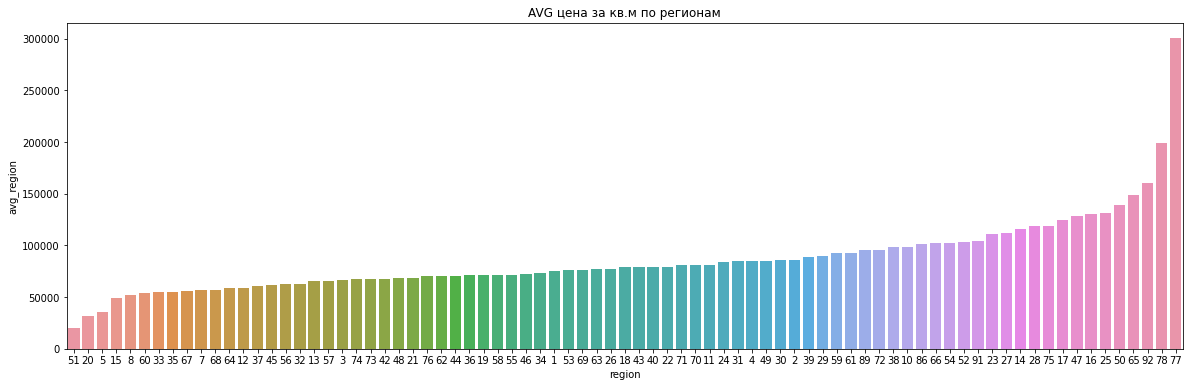

In [ ]:
# График для ср. цены за кв. метр по регионам
plt.figure(figsize=(20, 6))
plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
plt_avg_price = sns.barplot(data=sum_table_wt, y="avg_region", x="region", order=sum_table_wt['region']).set_title('AVG цена за кв.м по регионам')

## Сравнение объема вводимого жилья по годам и регионам.

Из полученных данных можно сделать вывод:

Наибольший объем вводимого жилья наблюдается в следующих регионах - Москва, Санкт-Петербург, Краснодарский край, Московская область.

Так же в некоторых регионах есть планы по введению жилья вплоть до 2038 года.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5, 75.5, 76.5,
        77.5, 78.5, 79.5, 80.5]), <a list of 81 Text major ticklabel objects>)

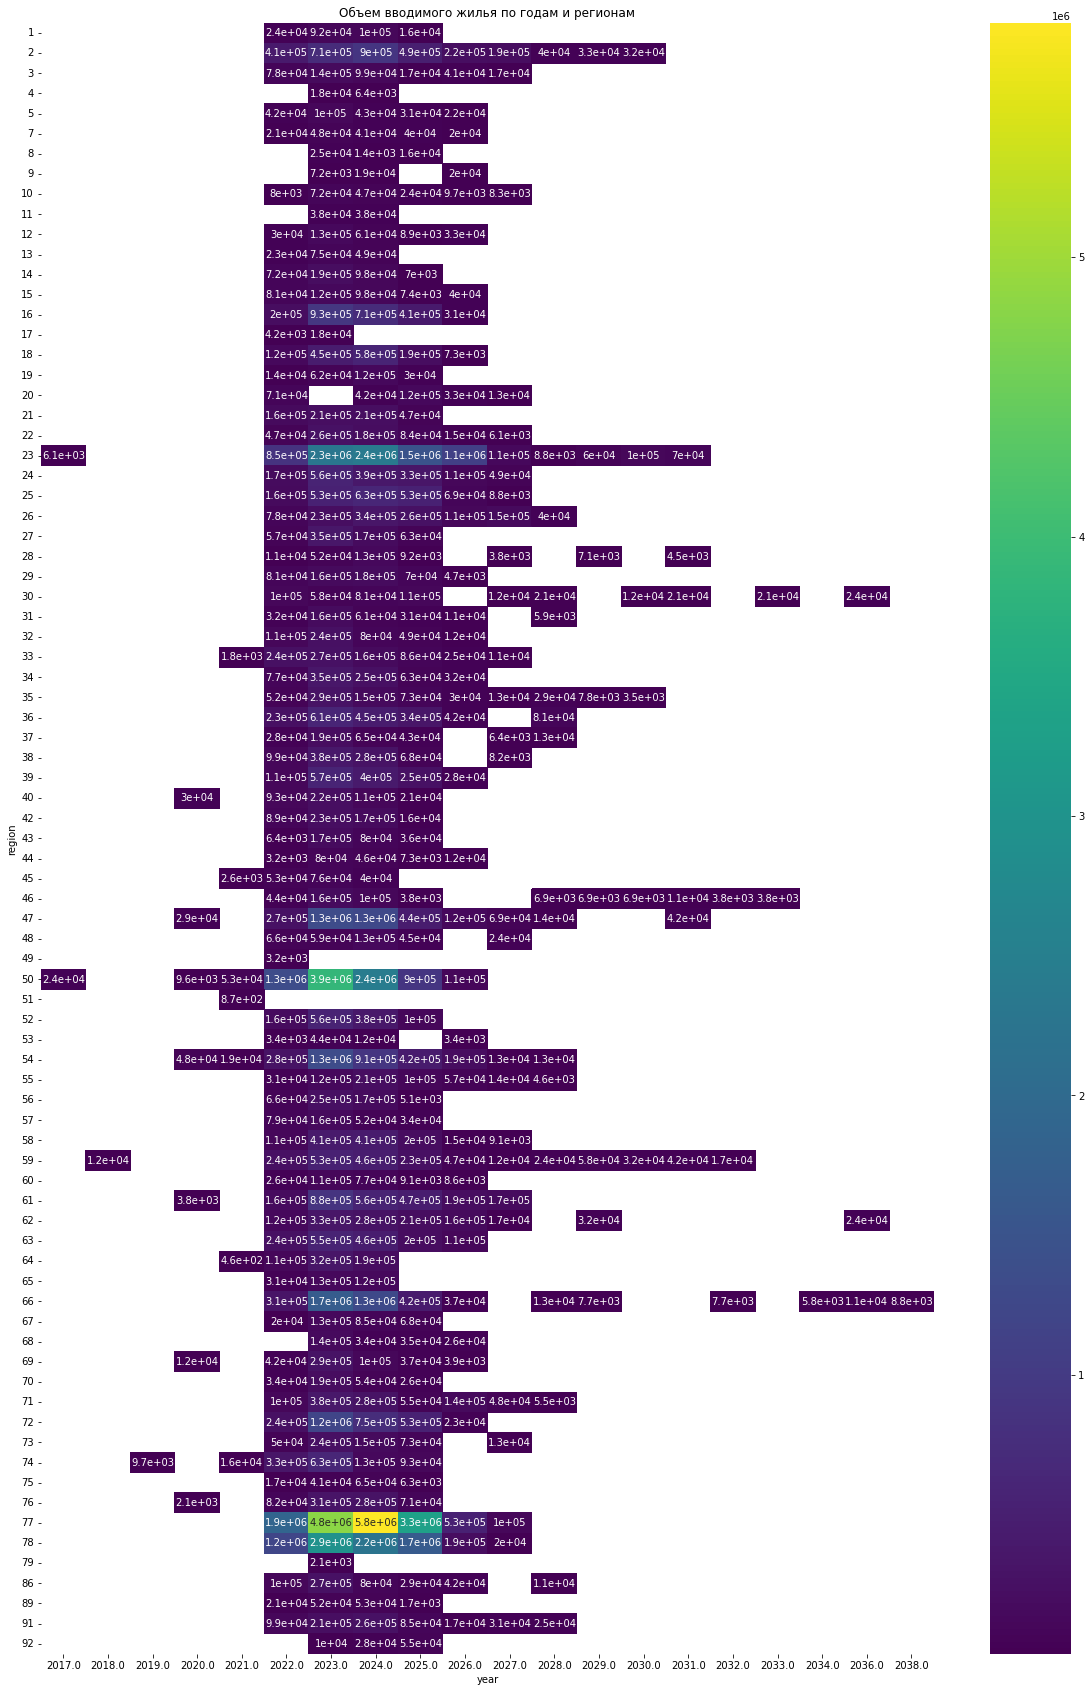

In [ ]:
plt.figure(figsize=(20,30))
sns.heatmap(pivot_table_vh, cmap=sns.color_palette("viridis", as_cmap=True), annot=True).set_title('Объем вводимого жилья по годам и регионам')
plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
plt.yticks(rotation=0)

## Сравнение объема вводимого жилья по годам.

Из полученных данных можно сделать вывод:

Наибольший объем вводимого жилья планируется на период с 2022 по 2024 года, с пиком в 2023.

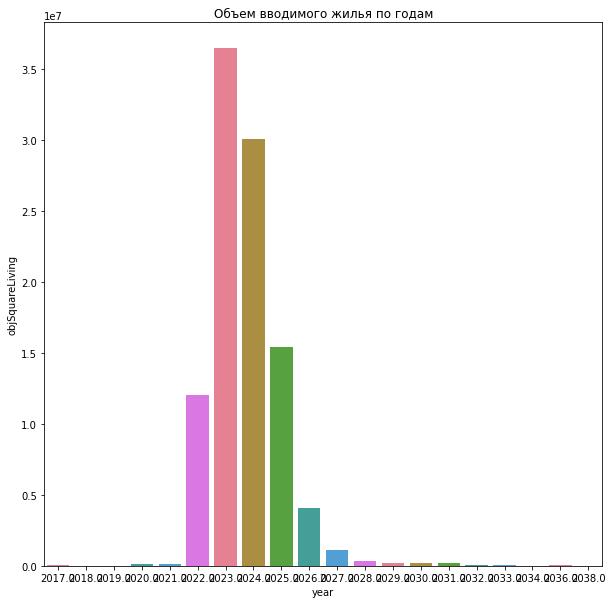

In [ ]:
plt.figure(figsize=(10, 10))
plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
value_year_plt = sns.barplot(data=value_year, x="year", y="objSquareLiving",  order=value_year['year'], palette=sns.color_palette("husl")).set_title('Объем вводимого жилья по годам')

## Сравнение объема вводимого жилья по регионам.

Из полученных данных можно сделать вывод:

Наибольший объем вводимого жилья наблюдается в следующих регионах - Москва, Московская область, Санкт-Петербург, Краснодарский край, Свердловская область.

Наименьший объем вводимого жилья наблюдается в следующих регионах - Мурманская область, Камчатский край, Республика Адыгея, Магаданская область, Республика Тыва.

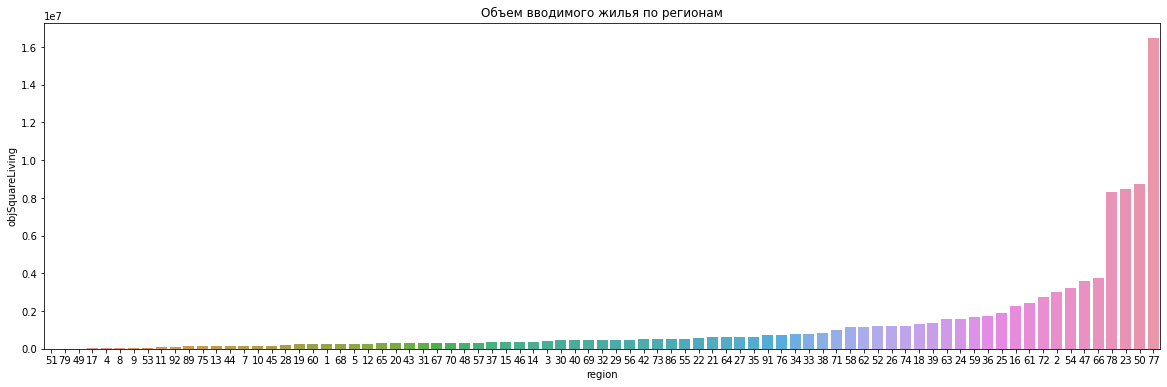

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
value_square_plt = sns.barplot(data=value_square, x="region", y="objSquareLiving",  order=value_square['region']).set_title('Объем вводимого жилья по регионам')

## Сравнение этажности домов в разных регионах.

Из полученных данных можно сделать вывод:

Наибольшая этажность зданий наблюдается в следующих регионах - Москва, Свердловская область, Чеченская Республика, Рязанская область, Республика Башкортостан.

Наименьший этажность зданий наблюдается в следующих регионах - Мурманская область, Костромская область, Ненецкий автономный округ, Республика Тыва, Республика Калмыкия.

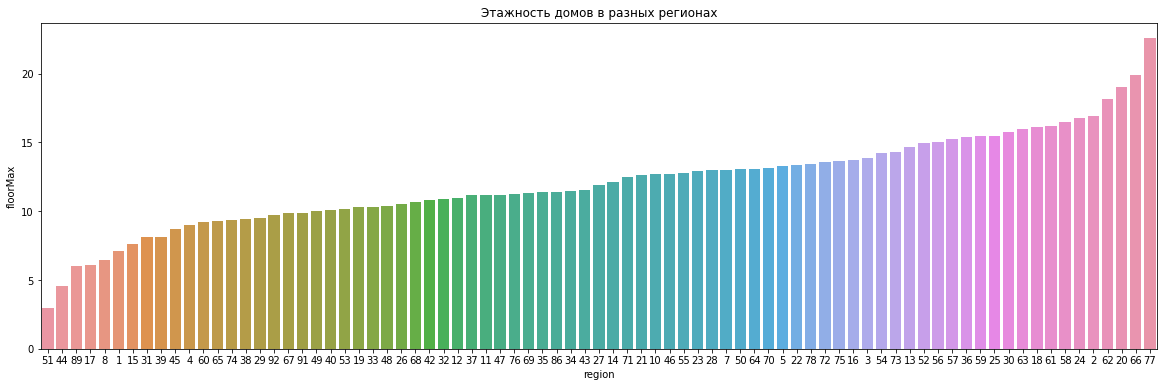

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
value_square_plt = sns.barplot(data=floor_region, x="region", y="floorMax",  order=floor_region['region']).set_title('Этажность домов в разных регионах')

## Сравнение количества квартир в разных регионах.

Из полученных данных можно сделать вывод:

Наибольшее число квартир наблюдается в следующих регионах - Москва, Санкт-Петербург, Московская область, Краснодарский край, Ленинградская область.

Наименьшее число квартир наблюдается в следующих регионах - Мурманская область, Магаданская область, Республика Алтай, Республика Тыва, Республика Калмыкия.

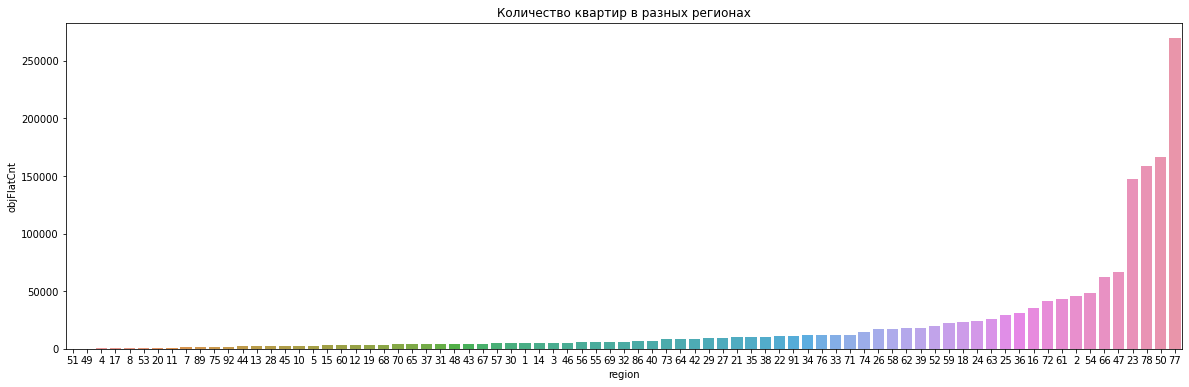

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
value_square_plt = sns.barplot(data=amount_apart, x="region", y="objFlatCnt",  order=amount_apart['region']).set_title('Количество квартир в разных регионах')

## Сравнение количества парковочных мест в разных регионах.

Из полученных данных можно сделать вывод:

Наибольшее число парковочных мест наблюдается в следующих регионах - Москва, Московская область, Краснодарский край, Санкт-Петербург, Новосибирская область.

Наименьшее число парковочных мест наблюдается в следующих регионах - Вологодская область, Магаданская область, Мурманская область, Новгородская область, Республика Тыва.

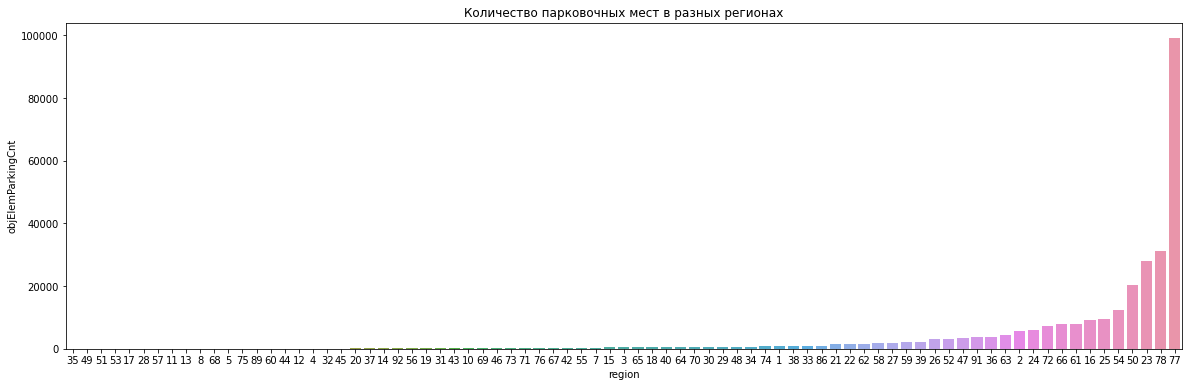

In [ ]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
value_square_plt = sns.barplot(data=amount_parking, x="region", y="objElemParkingCnt",  order=amount_parking['region']).set_title('Количество парковочных мест в разных регионах')

## Кореляция данных

Из графика корелляции полученных данных:

Наблюдается высокая кореляция между площадью жилья,количеством квартир и этажностью.

Так же существует некоторая зависимость между площадью жилья и колличеством парковочных мест.


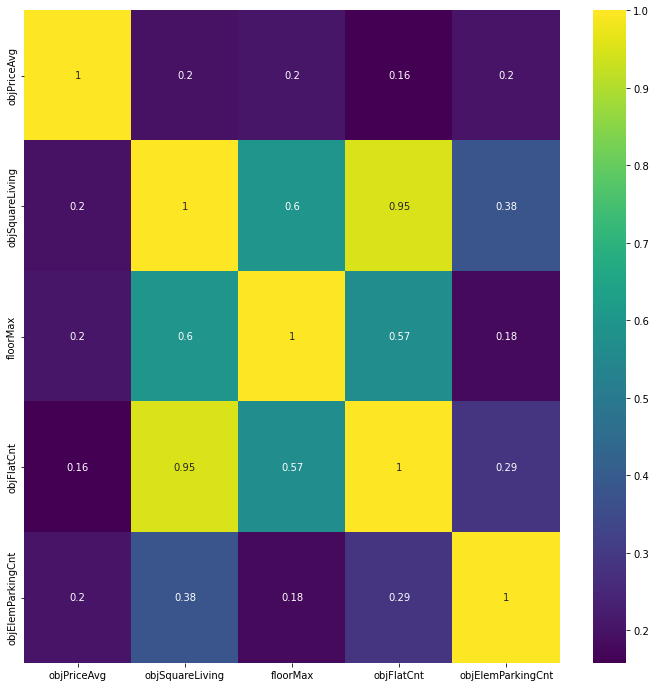

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_copy[['objPriceAvg', 'objSquareLiving', 'floorMax', 'objFlatCnt', 'objElemParkingCnt']].corr(), annot = True, cmap=sns.color_palette("viridis", as_cmap=True))

# Задание 4
## Реализация через ООП

## Пункт 1
### Парсинг сайта.

### Сбор ID всех объектов

In [ ]:
class PagesLoader:

    def __init__(self):
        self.offset_ = 1
        self.limit_ = 1000
        self.url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        self.objids = []
        self.obj_data = None
        self.flag = True

    def pars_id(self):
        while self.flag:
            try:
                res = requests.get(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0') #(self.url)
                self.obj_data = res.json()
                objects_list = self.obj_data.get('data').get('list')

                # Условие выхода, иначе бесконечный парсинг - рекорд 31001  ;)
                if not objects_list:
                  self.flag = False
                  break

                self.objids.extend([x.get('objId') for x in objects_list])
                self.offset_ += self.limit_
                print(self.offset_)
            except:
                self.flag = False
        return print('Парсинг окончен {}'.format(len(self.objids)))
    
    def ids_list(self):
        return self.objids


In [ ]:
pars_pages = PagesLoader()
pars_pages.pars_id()

1001
2001
3001
4001
5001
6001
7001
8001
9001
10001
11001
Парсинг окончен 10752


### Сбор объектов по ID

In [ ]:
class ObjectGathering:

    def __init__(self):
        self.obj_ids = pars_pages.ids_list()
        self.f_obj = []
        self.fullObj_urls = []

    def Gathering(self):
        for objID in self.obj_ids:
            self.fullObj_urls.append(f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{objID}')

        rs_f_obj = [grequests.get(u) for u in self.fullObj_urls]

        for res in grequests.imap(rs_f_obj, size=16):
            if not res.ok:
                continue

            obj_data = res.json()
            full_list = obj_data.get('data')

            if not full_list:
                continue

            clear_output()
            self.f_obj.append(full_list)
            print('\n', len(self.f_obj))
            print(f'{len(self.f_obj)}/{len(objids)}')

        print(len(self.f_obj))

    def full_object(self):
      return self.f_obj

    def jsn_convert(self):
      self.df_ids = pd.json_normalize(self.f_obj)
      return print('Датафрейм сохранён в переменной self.df_ids, в формате json')

In [ ]:
ids_objects = ObjectGathering()
ids_objects.Gathering()


 10752
10752/10752
10752


## Пункт 2
### Cохранение DF в CSV/Excel/Pickle/SQL

In [ ]:
ids_objects.jsn_convert()

Датафрейм сохранён в переменной self.df_ids, в формате json


In [ ]:
from sqlalchemy import create_engine

In [ ]:
class convert_saver:
    
    def __init__(self, DF):
        self.data = DF

    def csv_save(self):
        self.data.to_csv('csv_saver.csv')

    def excel_save(self):
        self.data.to_excel('excel_saver.xlsx')

    def pickle_save(self):
        self.data.to_pickle('./pickle_saver.pkl')

    def sql_save(self):
        self.data = self.data.applymap(str)
        engine = create_engine('sqlite:///sql_saver.db', echo=True)
        sql_con = engine.connect()
        sql_table = "Table"
        self.data.to_sql(sql_table, sql_con, if_exists='fail')

In [ ]:
saver = convert_saver(ids_objects.df_ids)
saver.csv_save()
saver.excel_save()
saver.pickle_save()

In [ ]:
saver.sql_save()

2022-12-03 07:20:24,678 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Table")


INFO:sqlalchemy.engine.Engine:PRAGMA main.table_info("Table")


2022-12-03 07:20:24,683 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-12-03 07:20:24,688 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Table")


INFO:sqlalchemy.engine.Engine:PRAGMA temp.table_info("Table")


2022-12-03 07:20:24,691 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


2022-12-03 07:20:24,713 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Table" (
	"index" BIGINT, 
	id TEXT, 
	"hobjId" TEXT, 
	"pdId" TEXT, 
	region TEXT, 
	address TEXT, 
	"floorMin" TEXT, 
	"floorMax" TEXT, 
	"objElemLivingCnt" TEXT, 
	"objReady100PercDt" TEXT, 
	"wallMaterialShortDesc" TEXT, 
	"objLkFinishTypeDesc" TEXT, 
	"objLkFreePlanDesc" TEXT, 
	"objElemParkingCnt" TEXT, 
	"objSquareLiving" TEXT, 
	"rpdNum" TEXT, 
	"rpdPdfLink" TEXT, 
	"rpdIssueDttm" TEXT, 
	"objLkLatitude" TEXT, 
	"objLkLongitude" TEXT, 
	"objCompensFundFlg" TEXT, 
	"objProblemFlg" TEXT, 
	"objLkClassDesc" TEXT, 
	"loadDttm" TEXT, 
	"photoRenderDTO" TEXT, 
	"objGuarantyEscrowFlg" TEXT, 
	"objectType" TEXT, 
	"miniUrl" TEXT, 
	"residentialBuildings" TEXT, 
	"newBuildingId" TEXT, 
	"objFloorCnt" TEXT, 
	"objFlatCnt" TEXT, 
	"objFlatSq" TEXT, 
	"objNonlivElemCnt" TEXT, 
	"objStatus" TEXT, 
	"isAvailableWantLiveHere" TEXT, 
	"objTransferPlanDt" TEXT, 
	"objLivCeilingHeight" TEXT, 
	"objInfrstrBicycleLaneFlg" TEXT, 


INFO:sqlalchemy.engine.Engine:
CREATE TABLE "Table" (
	"index" BIGINT, 
	id TEXT, 
	"hobjId" TEXT, 
	"pdId" TEXT, 
	region TEXT, 
	address TEXT, 
	"floorMin" TEXT, 
	"floorMax" TEXT, 
	"objElemLivingCnt" TEXT, 
	"objReady100PercDt" TEXT, 
	"wallMaterialShortDesc" TEXT, 
	"objLkFinishTypeDesc" TEXT, 
	"objLkFreePlanDesc" TEXT, 
	"objElemParkingCnt" TEXT, 
	"objSquareLiving" TEXT, 
	"rpdNum" TEXT, 
	"rpdPdfLink" TEXT, 
	"rpdIssueDttm" TEXT, 
	"objLkLatitude" TEXT, 
	"objLkLongitude" TEXT, 
	"objCompensFundFlg" TEXT, 
	"objProblemFlg" TEXT, 
	"objLkClassDesc" TEXT, 
	"loadDttm" TEXT, 
	"photoRenderDTO" TEXT, 
	"objGuarantyEscrowFlg" TEXT, 
	"objectType" TEXT, 
	"miniUrl" TEXT, 
	"residentialBuildings" TEXT, 
	"newBuildingId" TEXT, 
	"objFloorCnt" TEXT, 
	"objFlatCnt" TEXT, 
	"objFlatSq" TEXT, 
	"objNonlivElemCnt" TEXT, 
	"objStatus" TEXT, 
	"isAvailableWantLiveHere" TEXT, 
	"objTransferPlanDt" TEXT, 
	"objLivCeilingHeight" TEXT, 
	"objInfrstrBicycleLaneFlg" TEXT, 
	"objInfrstrPlaygrndCnt"

2022-12-03 07:20:24,717 INFO sqlalchemy.engine.Engine [no key 0.00338s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00338s] ()


2022-12-03 07:20:24,732 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-12-03 07:20:24,736 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Table_index" ON "Table" ("index")


INFO:sqlalchemy.engine.Engine:CREATE INDEX "ix_Table_index" ON "Table" ("index")


2022-12-03 07:20:24,738 INFO sqlalchemy.engine.Engine [no key 0.00195s] ()


INFO:sqlalchemy.engine.Engine:[no key 0.00195s] ()


2022-12-03 07:20:24,757 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-12-03 07:20:24,929 INFO sqlalchemy.engine.Engine BEGIN (implicit)


INFO:sqlalchemy.engine.Engine:BEGIN (implicit)


2022-12-03 07:20:26,180 INFO sqlalchemy.engine.Engine INSERT INTO "Table" ("index", id, "hobjId", "pdId", region, address, "floorMin", "floorMax", "objElemLivingCnt", "objReady100PercDt", "wallMaterialShortDesc", "objLkFinishTypeDesc", "objLkFreePlanDesc", "objElemParkingCnt", "objSquareLiving", "rpdNum", "rpdPdfLink", "rpdIssueDttm", "objLkLatitude", "objLkLongitude", "objCompensFundFlg", "objProblemFlg", "objLkClassDesc", "loadDttm", "photoRenderDTO", "objGuarantyEscrowFlg", "objectType", "miniUrl", "residentialBuildings", "newBuildingId", "objFloorCnt", "objFlatCnt", "objFlatSq", "objNonlivElemCnt", "objStatus", "isAvailableWantLiveHere", "objTransferPlanDt", "objLivCeilingHeight", "objInfrstrBicycleLaneFlg", "objInfrstrPlaygrndCnt", "objInfrstrSportGroundCnt", "objInfrstrTrashAreaCnt", "objInfrstrObjPrkngCnt", "objInfrstrNotObjPrkngCnt", "objInfrstrRampFlg", "objInfrstrCurbLoweringFlg", "objElevatorWheelchairCnt", "objElevatorPassengerCnt", "objElevatorCargoCnt", "objElevatorCargoP

INFO:sqlalchemy.engine.Engine:INSERT INTO "Table" ("index", id, "hobjId", "pdId", region, address, "floorMin", "floorMax", "objElemLivingCnt", "objReady100PercDt", "wallMaterialShortDesc", "objLkFinishTypeDesc", "objLkFreePlanDesc", "objElemParkingCnt", "objSquareLiving", "rpdNum", "rpdPdfLink", "rpdIssueDttm", "objLkLatitude", "objLkLongitude", "objCompensFundFlg", "objProblemFlg", "objLkClassDesc", "loadDttm", "photoRenderDTO", "objGuarantyEscrowFlg", "objectType", "miniUrl", "residentialBuildings", "newBuildingId", "objFloorCnt", "objFlatCnt", "objFlatSq", "objNonlivElemCnt", "objStatus", "isAvailableWantLiveHere", "objTransferPlanDt", "objLivCeilingHeight", "objInfrstrBicycleLaneFlg", "objInfrstrPlaygrndCnt", "objInfrstrSportGroundCnt", "objInfrstrTrashAreaCnt", "objInfrstrObjPrkngCnt", "objInfrstrNotObjPrkngCnt", "objInfrstrRampFlg", "objInfrstrCurbLoweringFlg", "objElevatorWheelchairCnt", "objElevatorPassengerCnt", "objElevatorCargoCnt", "objElevatorCargoPassengerCnt", "soldOutPe

2022-12-03 07:20:26,186 INFO sqlalchemy.engine.Engine [generated in 1.06605s] ((0, '13398', '37165', '28141', '72', 'г Тюмень, ул Профсоюзная, д. 56', '7', '10', '43', '2024-12-31', 'Другое', 'Без отделки', 'Нет', '0', '4812.98', '72-000097', 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/5ec465b2-7ffb-4a5a-ac92-f17668eb58a7', '11-11-2022 06:42', '57.1519', '65.5544', '0', '0', 'Элитный', '03-12-2022 01:19', "[{'objId': 13398, 'pdId': 28141, 'rpdId': 657486, 'devId': 306, 'ordNum': 1, 'objRenderPhotoSize': 1325881, 'objRenderPhotoUrl': 'https://xn--80az8a. ... (1892 characters truncated) ... g': 0, 'objRenderPhotoNm': 'IMG_8924.JPG', 'objReadyDesc': 'Строится', 'objBuildTypeShortDesc': 'Жилое', 'knFlg': 1, 'loadDttm': '03-12-2022 01:03'}]", '0', 'normal', 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/8444e255-8fdf-4ff6-81e1-658e1e075c23', '1', '37165', '10', '43', '4812.98', '48', '0', 'True', '28-02-2025 12:00', '2,96', '0', '1.0', '1.0', '1.0', '4.0', '15.0', '1', '1', '0.

INFO:sqlalchemy.engine.Engine:[generated in 1.06605s] ((0, '13398', '37165', '28141', '72', 'г Тюмень, ул Профсоюзная, д. 56', '7', '10', '43', '2024-12-31', 'Другое', 'Без отделки', 'Нет', '0', '4812.98', '72-000097', 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/5ec465b2-7ffb-4a5a-ac92-f17668eb58a7', '11-11-2022 06:42', '57.1519', '65.5544', '0', '0', 'Элитный', '03-12-2022 01:19', "[{'objId': 13398, 'pdId': 28141, 'rpdId': 657486, 'devId': 306, 'ordNum': 1, 'objRenderPhotoSize': 1325881, 'objRenderPhotoUrl': 'https://xn--80az8a. ... (1892 characters truncated) ... g': 0, 'objRenderPhotoNm': 'IMG_8924.JPG', 'objReadyDesc': 'Строится', 'objBuildTypeShortDesc': 'Жилое', 'knFlg': 1, 'loadDttm': '03-12-2022 01:03'}]", '0', 'normal', 'https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/file/8444e255-8fdf-4ff6-81e1-658e1e075c23', '1', '37165', '10', '43', '4812.98', '48', '0', 'True', '28-02-2025 12:00', '2,96', '0', '1.0', '1.0', '1.0', '4.0', '15.0', '1', '1', '0.0', '3.0', '3.0', '6', '

2022-12-03 07:20:26,943 INFO sqlalchemy.engine.Engine COMMIT


INFO:sqlalchemy.engine.Engine:COMMIT


2022-12-03 07:20:27,108 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


INFO:sqlalchemy.engine.Engine:SELECT name FROM sqlite_master WHERE type='table' ORDER BY name


2022-12-03 07:20:27,116 INFO sqlalchemy.engine.Engine [raw sql] ()


INFO:sqlalchemy.engine.Engine:[raw sql] ()


### Обработка ДатаФрейма

In [ ]:
class adapt_df:
    def __init__(self, DF):
        self.df = DF

    def del_nan(self):
        self.df = self.df[['id', 'region', 'objPriceAvg', 'objSquareLiving', 'objReady100PercDt', 'floorMax', 'objFlatCnt', 'objElemParkingCnt']]
        self.df_copy = self.df.copy()
        self.df_copy = self.df_copy.dropna().reset_index(drop=True)


df_ids = pd.read_csv('csv_saver.csv', index_col=0)
table = adapt_df(df_ids)
table.del_nan()

## Пункт 3
### Визуализация данных

In [ ]:
class visualizer:
    
    def __init__(self, DF, DF2):
         self.df_1 = DF
         self.df_2 = DF2
    
    def Barplot(self):
        self.df_1['Price*Square'] = self.df_1['objPriceAvg'] * self.df_1['objSquareLiving']
        sum_table_wt = pd.pivot_table(self.df_1,
                              index=["region"],
                              values=["objSquareLiving", "objPriceAvg", "Price*Square"],
                              aggfunc=[np.sum])
        sum_table_wt = sum_table_wt.droplevel(0, axis=1)  # сбросим id
        sum_table_wt['avg_region'] = sum_table_wt['Price*Square'] / sum_table_wt['objSquareLiving']  # добавим атрибут для ср. знач. по региону
        sum_table_wt = sum_table_wt.sort_values('avg_region').reset_index()
        plt.figure(figsize=(20, 6))
        plt.xticks(rotation=0) # 0 - горизонтально, 90 - вертикально
        sns.barplot(data=sum_table_wt, y="avg_region", x="region", order=sum_table_wt['region']).set_title('AVG цена за кв.м по регионам')
        plt.show()

    def Heatmap(self):
        # Сводная таблица для объема вводимого жилья по годам и регионам
        table_vh = self.df_2[['region', 'objSquareLiving', 'objReady100PercDt']].copy()
        table_vh['year'] = pd.DatetimeIndex(df['objReady100PercDt']).year
        # Удаление NaN
        table_vh['objSquareLiving'] = self.df_2['objSquareLiving'].replace(0, np.nan)
        table_vh = table_vh.dropna(axis=0).reset_index(drop=True)

        pivot_table_vh = table_vh.pivot_table(index=["region"],
                                              columns=["year"],
                                              values="objSquareLiving",
                                              aggfunc=np.sum)
        plt.figure(figsize=(20,30))
        sns.heatmap(pivot_table_vh, 
                    cmap=sns.color_palette("viridis", as_cmap=True), 
                    annot=True).set_title('Объем вводимого жилья по годам и регионамм')
        plt.yticks(rotation=0)
        plt.xticks(rotation=0)
        plt.show()


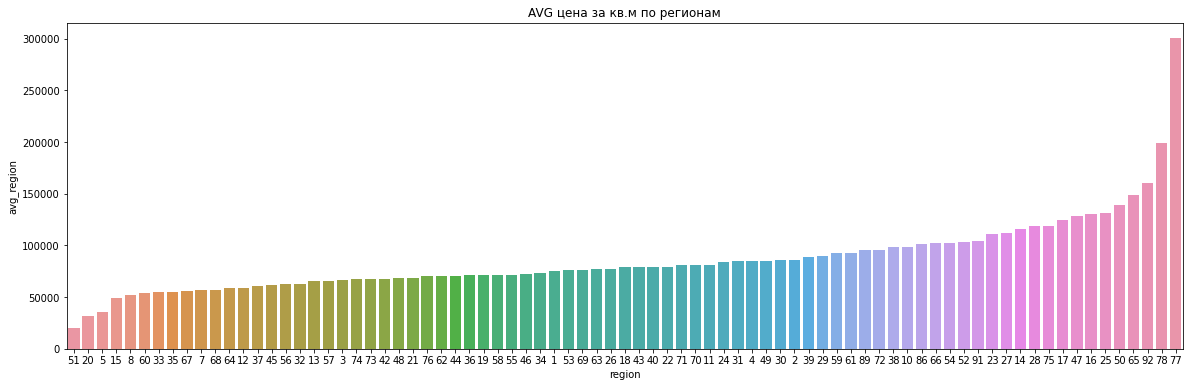

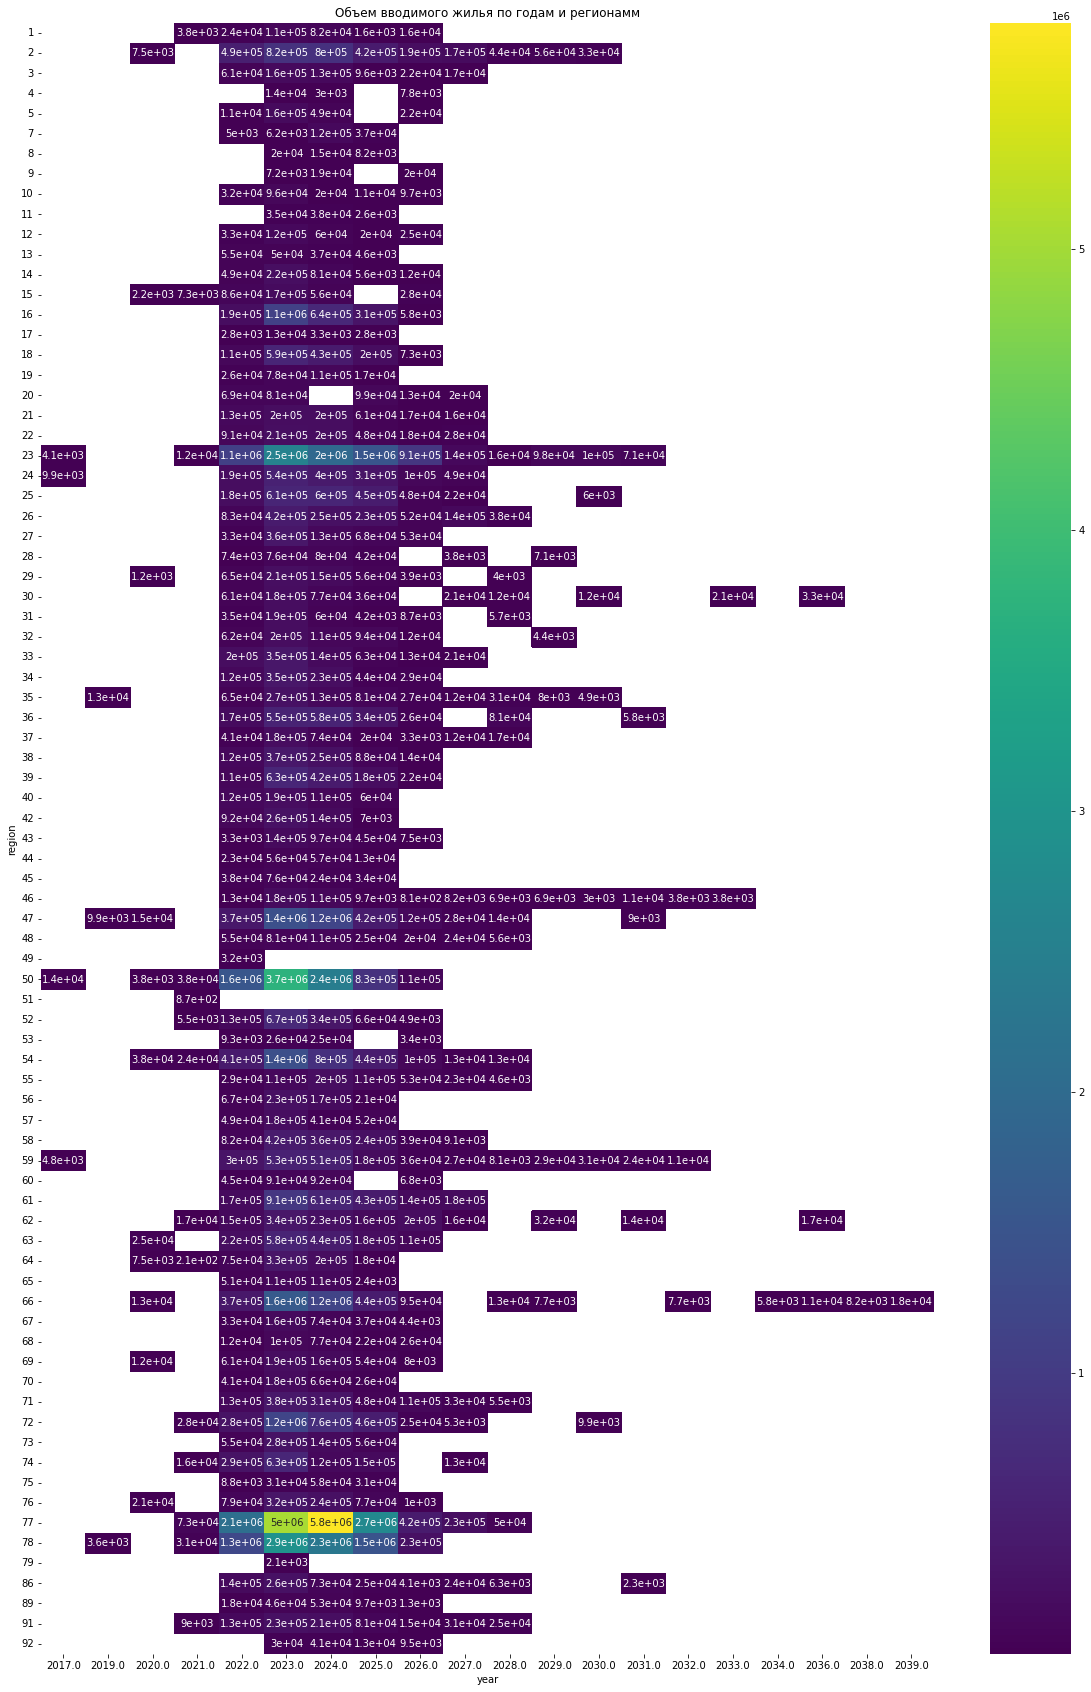

In [ ]:
data_vis = table.df_copy
vis = visualizer(data_vis, df_ids)
vis.Barplot()
vis.Heatmap()